Defining the model

In [1]:
import pandas as pd
games_season=pd.read_csv('games_season.csv')

In [2]:
# Imports
from keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,output_dim=1,input_length=1,name='Team-Strength')

Using TensorFlow backend.


In [3]:
# Imports
from keras.layers import Input, Embedding, Flatten
from keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

W0724 22:25:07.006323 140456262465280 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 22:25:07.027817 140456262465280 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 22:25:07.034503 140456262465280 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



We set up 2 input layers here

In [4]:
# Load the input layer from keras.layers
from keras.layers import Input

# Input layer for team 1
team_in_1 = Input(shape=(1,), name='Team-1-In')

# Separate input layer for team 2
team_in_2 = Input(shape=(1,), name='Team-2-In')

In [5]:
# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)

# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)

We use merging of the layers. We use the Subtract() to create a layer which  the difference of the team lookup strengths of the 2 teams


In [6]:
# Import the Subtract layer from keras
from keras.layers import Subtract

# Create a subtract layer using the inputs from the previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

In [7]:
# Imports
from keras.layers import Subtract
from keras.models import Model

# Subtraction layer from previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# Create the model
model = Model([team_in_1, team_in_2], score_diff)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

W0724 22:25:07.357555 140456262465280 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# Fit, Predict and Evaluate

In [8]:
# Get the team_1 column from the regular season data
input_1 = games_season['team_1']

# Get the team_2 column from the regular season data
input_2 = games_season['team_2']

# Fit the model to input 1 and 2, using score diff as a target
training=model.fit([input_1, input_2],games_season['score_diff'],epochs=10,batch_size=2048,validation_split=0.10,verbose=True)

W0724 22:25:07.540854 140456262465280 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0724 22:25:07.626098 140456262465280 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 280960 samples, validate on 31218 samples
Epoch 1/10
280960/280960 [==============================] - 1s 2us/step - loss: 12.1203 - val_loss: 11.8379
Epoch 2/10
280960/280960 [==============================] - 0s 1us/step - loss: 12.0968 - val_loss: 11.8206
Epoch 3/10
280960/280960 [==============================] - 0s 1us/step - loss: 12.0734 - val_loss: 11.8033
Epoch 4/10
280960/280960 [==============================] - 0s 1us/step - loss: 12.0502 - val_loss: 11.7860
Epoch 5/10
280960/280960 [==============================] - 0s 1us/step - loss: 12.0269 - val_loss: 11.7687
Epoch 6/10
280960/280960 [==============================] - 0s 1us/step - loss: 12.0036 - val_loss: 11.7514
Epoch 7/10
280960/280960 [==============================] - 0s 1us/step - loss: 11.9803 - val_loss: 11.7342
Epoch 8/10
280960/280960 [==============================] - 0s 1us/step - loss: 11.9570 - val_loss: 11.7169
Epoch 9/10
280960/280960 [==============================] - 0s 1us/step - loss: 11.93

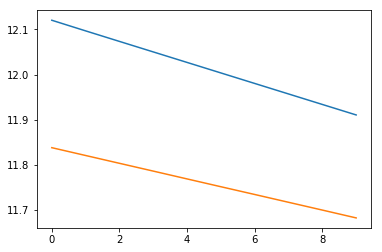

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

In [10]:
games_tourney=pd.read_csv('games_tourney.csv')

In [11]:
input_1 = games_tourney['team_1']
input_2 = games_tourney['team_2']
print(model.evaluate([input_1, input_2], games_tourney['score_diff'], verbose=False))

11.60797876809417
